# Проект. Исследование стартапов

- Автор: Майорова Алина
- Дата: 06.11.25

### Введение

**Цель проекта:** анализ исторических данных о финансировании стартапов для выявления перспективных направлений инвестиций и оптимальных стратегий финансирования на 2015 год.

**В рамках поставленной задачи необходимо выполнить полный цикл аналитического исследования:** начиная с загрузки и предобработки данных, включая проверку на корректность, пропуски и дубликаты, до глубокого содержательного анализа, включающего:
- сегментацию рынка и исследование динамики финансирования по отраслям;
- сравнительную оценку эффективности различных типов финансирования;
- анализ возвратности инвестиций по категориям вложений;
- разработку обоснованных рекомендаций по выбору перспективных отраслей и инвестиционных инструментов.

Проект направлен на создание аналитической основы для принятия взвешенных инвестиционных решений венчурной компанией.

### Описание данных

Основные данные для анализа представлены в датасете cb_investments.zip, содержащем файл `cb_investments.csv` с информацией о стартапах и их финансировании из базы данных стартапов.

Описание данных:
* `name` — название компании.
* `homepage_url` — ссылка на сайт компании.
* `category_list` — категории, в которых работает компания. Указываются через `|`.
* `market` — основной рынок или отрасль компании.
* `funding_total_usd` — общий объём привлечённых инвестиций в долларах США.
* `status` — текущий статус компании, например `operating`, `closed` и так далее.
* `country_code` — код страны, например USA.
* `state_code` — код штата или региона, например, CA.
* `region` — регион, например, SF Bay Area.
* `city` — город, в котором расположена компания.
* `funding_rounds` — общее число раундов финансирования.
* `participants` — число участников в раундах финансирования.
* `founded_at` — дата основания компании.
* `founded_month` — месяц основания в формате `YYYY-MM`.
* `founded_quarter` — квартал основания в формате `YYYY-QN`.
* `founded_year` — год основания.
* `first_funding_at` — дата первого финансирования.
* `mid_funding_at` — дата среднего по времени раунда финансирования.
* `last_funding_at` — дата последнего финансирования.
* `seed` — сумма инвестиций на посевной стадии.
* `venture` — сумма венчурных инвестиций.
* `equity_crowdfunding` — сумма, привлечённая через долевой краудфандинг.
* `undisclosed` — сумма финансирования нераскрытого типа.
* `convertible_note` — сумма инвестиций через конвертируемые займы.
* `debt_financing` — сумма долгового финансирования.
* `angel` — сумма инвестиций от бизнес-ангелов.
* `grant` — сумма полученных грантов.
* `private_equity` — сумма инвестиций в виде прямых (частных) вложений.
* `post_ipo_equity` — сумма финансирования после IPO.
* `post_ipo_debt` — сумма долгового финансирования после IPO.
* `secondary_market` — сумма сделок на вторичном рынке.
* `product_crowdfunding` — сумма, привлечённая через продуктовый краудфандинг.
* `round_A` — `round_H` — сумма инвестиций в соответствующем раунде.

Название дополнительного датасета — `cb_returns.csv`. Он содержит суммы возвратов по типам финансирования в миллионах долларов по годам.

Описание данных:
* `year` — год возврата средств.
* `seed` — сумма возвратов от посевных инвестиций.
* `venture` — сумма возвратов от венчурных инвестиций.
* `equity_crowdfunding` — сумма, возвращённая по долевому краудфандингу.
* `undisclosed` — сумма возвратов нераскрытого типа.
* `convertible_note` — сумма возвратов через конвертируемые займы.
* `debt_financing` — сумма возвратов от долгового финансирования.
* `angel` — сумма возвратов бизнес-ангелам.
* `grant` — сумма возвратов по грантам.
* `private_equity` — сумма возвратов прямых (частных) вложений.
* `post_ipo_equity` — сумма возвратов от IPO.
* `post_ipo_debt` — сумма возвратов от долгового IPO.
* `secondary_market` — сумма возвратов от сделок на вторичном рынке.
* `product_crowdfunding` — сумма возвратов по продуктовому краудфандингу.

### Содержимое проекта
1. Загрузка данных и знакомство с ними
2. Предобработка данных:
- Название столбцов
- Типы данных
- Наличие пропусков в данных
- Явные и неявные дубликаты в данных
2. Инжиниринг признаков
- Группировка компаний по срокам финансирования
- Сегментация рынка на массовые, средние и нишевые направления
3. Работа с выбросами и анализ
- Идентификация и обработка аномальных значений
- Сравнительный анализ типов финансирования
- Оценка возвратности инвестиций
4. Анализ динамики
- Исследование временных трендов финансирования
- Анализ роста перспективных сегментов
- Оценка устойчивости возвратов по типам финансирования
5. Итоговый вывод

## Загрузка данных и знакомство с ними

Установим специальную библиотеку для работы с корреляцией и загрузим все необходимые библиотеки для анализа данных `cb_investments.csv` и `cb_returns.csv`. 

In [1]:
!pip install phik

In [2]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

# Загружаем библиотеку для создания легенды
import matplotlib.patches as mpatches

In [3]:
# Выгружаем данные в переменные `df` и `returns_info`
df = pd.read_csv("https://code.s3.yandex.net/datasets/cb_investments.zip", sep=';', low_memory=False)
returns_info = pd.read_csv('https://code.s3.yandex.net/datasets/cb_returns.csv')

Познакомимся с информацией из датафрейма `cb_investments.csv`. Затем выведем первые строки и результат метода info().

In [4]:
# Выводим информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  49437 non-null  object 
 1   homepage_url          45989 non-null  object 
 2   category_list         45477 non-null  object 
 3    market               45477 non-null  object 
 4    funding_total_usd    49438 non-null  object 
 5   status                48124 non-null  object 
 6   country_code          44165 non-null  object 
 7   state_code            30161 non-null  object 
 8   region                44165 non-null  object 
 9   city                  43322 non-null  object 
 10  funding_rounds        49438 non-null  float64
 11  participants          30473 non-null  float64
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

In [5]:
# Выводим первые строки во всех столбцах датафрейма
pd.set_option('display.max_columns', None)
df.head()

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,participants,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,mid_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,Harvard University,http://harvard.edu,|Education|,Education,"9,00,00,000",operating,USA,MA,Boston,Cambridge,1.0,NaN,1636-09-08,NaN,NaN,1636.0,2014-01-06,NaN,2014-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,University of New Brunswick,http://www.unb.ca,NaN,NaN,"20,00,000",operating,NaN,NaN,NaN,NaN,1.0,NaN,1785-01-01,NaN,NaN,1785.0,2014-05-15,NaN,2014-05-15,0.0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,DuPont,http://www.dupont.com,|Business Services|Agriculture|Automotive|Inve...,Business Services,"90,00,000",operating,USA,DE,"Wilmington, Delaware",Wilmington,1.0,1.0,1802-07-19,NaN,NaN,1802.0,2009-07-02,2009-07-02,2009-07-02,0.0,9000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,University of Michigan,http://www.umich.edu/,|Education|,Education,"77,00,000",operating,USA,MI,Detroit,Ann Arbor,3.0,0.0,1817-01-01,NaN,NaN,1817.0,2013-11-21,2013-11-21,2014-11-03,0.0,0.0,0.0,1600000.0,0.0,0.0,0.0,6100000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Case Western Reserve University,http://www.case.edu,|Education|,Education,"5,40,000",operating,USA,OH,Cleveland,Cleveland,1.0,NaN,1826-01-01,NaN,NaN,1826.0,2014-01-14,NaN,2014-01-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,540000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Промежуточный вывод 

Данные датафрейма `cb_investments.csv` представлены в виде таблицы из 54 294 строк и 40 столбцов с информацией о компаниях и состоявшемся финансировании.

**1. Типы данных:**
- Столбцы с полными датами: `founded_at`, `first_funding_at`, `mid_funding_at`, `last_funding_at` хранятся как `object` и требуют преобразования в `datetime`. 
- Столбцы с выделенной частью даты `founded_month`, `founded_quarter`, `founded_year` можно преобразовать в целочисленный тип после обработки пропусков.
- `funding_total_usd` необходимо очистить от форматирования и преобразовать в числовой тип.
- `funding_rounds` логичнее привести к `int64`.

**2. Особенности данных:**

- В названии двух столбцов `market` и `funding_total_usd` присутствуют пропуски.
- Для удобства в `category_list` необходимо разделитель `|` заменить на `,`.
- Во всех столбцах датафрейма присутствуют пропуски.

Теперь познакомимся с данными из датафрейма `cb_returns.csv`. Затем выведем первые строки и результат метода info().

In [6]:
# Выводим информацию о датафрейме
returns_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  15 non-null     int64  
 1   seed                  15 non-null     float64
 2   venture               15 non-null     float64
 3   equity_crowdfunding   15 non-null     float64
 4   undisclosed           15 non-null     float64
 5   convertible_note      15 non-null     float64
 6   debt_financing        15 non-null     float64
 7   angel                 15 non-null     float64
 8   grant                 15 non-null     float64
 9   private_equity        15 non-null     float64
 10  post_ipo_equity       15 non-null     float64
 11  post_ipo_debt         15 non-null     float64
 12  secondary_market      15 non-null     float64
 13  product_crowdfunding  15 non-null     float64
dtypes: float64(13), int64(1)
memory usage: 1.8 KB


In [7]:
# Выводим первые строки датафрейма
returns_info.head()

,year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding
0,2000,16.70,55.40,0.0,78.21,0.00,8.66,6.43,0.0,0.00,0.94,0.0,0.20,0.0
1,2001,2.88,23.49,0.0,21.50,0.01,4.49,1.18,0.0,0.00,0.46,0.0,0.46,0.0
2,2002,6.59,209.42,0.0,25.77,0.02,3.42,3.41,0.0,1.51,0.34,0.0,0.06,0.0
3,2003,7.74,233.86,0.0,9.40,0.01,1.09,3.41,0.0,1.62,2.11,0.0,0.08,0.0
4,2004,9.93,555.90,0.0,33.19,0.01,13.55,9.18,0.0,2.19,3.38,0.0,0.55,0.0


### Промежуточный вывод

Данные датафрейма `cb_returns.csv` представлены в виде таблицы из 15 строк и 14 столбцов с информацией об объёмах возвратов по годам и типам финансирования.

**1. Типы данных:** Все типы данных корректны.
- Столбец `year` - int64
- Остальные столбцы - float64 (денежные показатели)

**2. Пропуски в данных отсутсвуют.**

**3. Особенности данных:**
- Названия столбцов корректны.
- Данные охватывают 15-летний период c 2000 по 2014 год.
- Столбец `year` необходимо сделать индексом датафрейма для удобства временного анализа.

## Предобработка данных

###  Названия столбцов 

В начале предобработки необходимо привести в порядок названия столбцов датафрейма `cb_investments.csv`.

In [8]:
# Убираем пробелы в названиях столбцов
df.columns = df.columns.str.strip()

In [9]:
# Проверяем названия столбцов
df.columns

Index(['name', 'homepage_url', 'category_list', 'market', 'funding_total_usd',
       'status', 'country_code', 'state_code', 'region', 'city',
       'funding_rounds', 'participants', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at', 'mid_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

### Типы данных

Первым шагом обработаем столбец `funding_total_usd` - уберем разделители разрядов (запятые) и преобразуем значения к числовому типу.

In [10]:
# Убираем разделители и преобразуем к числовому типу
df['funding_total_usd'] = df['funding_total_usd'].str.replace(',', '')
df['funding_total_usd'] = pd.to_numeric(df['funding_total_usd'], errors='coerce')

Для корректного анализа временных характеристик компаний преобразуем столбцы с полными датами из строкового формата в тип `datetime`.

In [11]:
# Преобразуем столбцы с полными датами из строкового формата в datetime
date_columns = ['founded_at', 'first_funding_at', 'mid_funding_at', 'last_funding_at']

for column in date_columns:
    df[column] = pd.to_datetime(df[column], errors='coerce')

Столбцы с выделенной частью даты `founded_month`, `founded_quarter`, `founded_year`, а также числовые поля `funding_rounds` и `participants` **будут преобразованы в целочисленные типы после обработки пропусков.**

Для удобства временного анализа и сопоставления данных по годам установим столбец `year` в качестве индекса датасета `cb_returns`.

In [12]:
# Устанавливаем столбец year в качестве индекса датафрейма
returns_info.set_index('year', inplace=True)

In [13]:
# Проверяем корректность преобразования в df
df.dtypes

name                            object
homepage_url                    object
category_list                   object
market                          object
funding_total_usd              float64
status                          object
country_code                    object
state_code                      object
region                          object
city                            object
funding_rounds                 float64
participants                   float64
founded_at              datetime64[ns]
founded_month                   object
founded_quarter                 object
founded_year                   float64
first_funding_at        datetime64[ns]
mid_funding_at          datetime64[ns]
last_funding_at         datetime64[ns]
seed                           float64
venture                        float64
equity_crowdfunding            float64
undisclosed                    float64
convertible_note               float64
debt_financing                 float64
angel                    

На данном этапе были выполнены следующие преобразования типов данных:
- `funding_total_usd` преобразован числовой тип после удаления разделителей разрядов.
- 4 столбца с полными датами преобразованы из строкового формата в `datetime64`.
- В датасете `cb_returns` столбец `year` установлен в качестве индекса.

### Наличие пропусков в данных

In [14]:
# Посчитаем количество пропусков в каждом столбце
absolute_nulls = df.isna().sum().sort_values(ascending=False)
absolute_nulls

state_code              24133
mid_funding_at          24006
participants            23821
founded_quarter         15812
founded_month           15812
founded_at              15741
founded_year            15740
funding_total_usd       13387
city                    10972
region                  10129
country_code            10129
market                   8817
category_list            8817
homepage_url             8305
status                   6170
first_funding_at         4866
last_funding_at          4862
name                     4857
post_ipo_debt            4856
round_F                  4856
round_G                  4856
round_E                  4856
round_D                  4856
round_C                  4856
round_B                  4856
round_A                  4856
product_crowdfunding     4856
secondary_market         4856
venture                  4856
post_ipo_equity          4856
private_equity           4856
grant                    4856
angel                    4856
debt_finan

In [15]:
# Найдем долю пропусков
relative_nulls = (df.isna().sum() / len(df) * 100).round(2).sort_values(ascending=False)
relative_nulls

state_code              44.45
mid_funding_at          44.21
participants            43.87
founded_quarter         29.12
founded_month           29.12
founded_year            28.99
founded_at              28.99
funding_total_usd       24.66
city                    20.21
region                  18.66
country_code            18.66
market                  16.24
category_list           16.24
homepage_url            15.30
status                  11.36
first_funding_at         8.96
last_funding_at          8.95
name                     8.95
post_ipo_debt            8.94
round_F                  8.94
round_G                  8.94
round_E                  8.94
round_D                  8.94
round_C                  8.94
round_B                  8.94
round_A                  8.94
product_crowdfunding     8.94
secondary_market         8.94
venture                  8.94
post_ipo_equity          8.94
private_equity           8.94
grant                    8.94
angel                    8.94
debt_finan

**На основе анализа распределения пропусков по столбцам разработана следующая стратегия обработки:**
1. Критические пропуски (удаление строк):
- `name` (8.95%) - без названия компании данные теряют смысл для анализа конкретных стартапов
- `funding_total_usd` (8.94%) - ключевой показатель объема инвестиций, необходим для финансового анализа
- `funding_rounds` (8.94%) - базовый параметр для анализа структуры и динамики финансирования

*Cтроки без этих данных не несут ценной информации для исследования инвестиционных стратегий.*

2. Текстовые данные (заполнение заглушками):
Заполним пропуски в столбцах `homepage_url`, `category_list`, `market, status`, `country_code`, `state_code`, `region`, `city` значением 'not_specified'. *Это сохранит целостность данных для категориального анализа.*

In [16]:
# Заполним пропуски в текстовых столбцах заглушками
text_columns = ['homepage_url', 'category_list', 'market', 'status', 
                'country_code', 'state_code', 'region', 'city']
for column in text_columns:
    df[column] = df[column].fillna('not_specified')

In [17]:
# Удалим пропуски в столбцах name, funding_total_usd, funding_rounds
df = df.dropna(subset= ['name', 'funding_total_usd', 'funding_rounds'])

# Преобразование funding_rounds в целочисленный тип
df['funding_rounds'] = df['funding_rounds'].astype(int)

Проверим содержание пропусков после преобразований.

In [18]:
# Проверим долю пропусков
relative_nulls1 = (df.isna().sum() / len(df) * 100).round(2).sort_values(ascending=False)
relative_nulls1

mid_funding_at          33.43
participants            33.19
founded_quarter         21.44
founded_month           21.44
founded_at              21.29
founded_year            21.28
angel                    0.00
grant                    0.00
private_equity           0.00
post_ipo_equity          0.00
post_ipo_debt            0.00
name                     0.00
convertible_note         0.00
secondary_market         0.00
product_crowdfunding     0.00
round_A                  0.00
round_B                  0.00
round_C                  0.00
round_D                  0.00
round_E                  0.00
round_F                  0.00
round_G                  0.00
debt_financing           0.00
venture                  0.00
undisclosed              0.00
equity_crowdfunding      0.00
homepage_url             0.00
seed                     0.00
last_funding_at          0.00
first_funding_at         0.00
funding_rounds           0.00
city                     0.00
region                   0.00
state_code

Пропуски остались только в временных данных:
- Пропуски в `mid_funding_at` (33.43%) заполним на основе имеющихся дат `first_funding_at` и `last_funding_at`, вычисляя среднюю дату между ними. *Это позволит сохранить временные метки для анализа продолжительности финансирования.*
- Пропуски в `founded_at` оставим без изменения, так как они не критичны для основного анализа финансирования.
- Пропуски в `founded_year`, `founded_month`, `founded_quarter` заполним извлеченными компонентами даты из `founded_at` (где это возможно), а оставшиеся пропуски заполним значением 0 с последующим преобразованием в целочисленный тип.

Пропуски в `participants` также оставим, поскольку этот параметр не является ключевым для исследования инвестиционных стратегий.

In [19]:
# founded_year - извлечем год, пропуски заполним 0 и преобразуем в int
df['founded_year'] = df['founded_at'].dt.year.fillna(0).astype(int)

# founded_month - извлечем месяц, пропуски заполним 0 и преобразуем в int
df['founded_month'] = df['founded_at'].dt.month.fillna(0).astype(int)

# founded_quarter - извлечем квартал, пропуски заполним 0 и преобразуем в int
df['founded_quarter'] = df['founded_at'].dt.quarter.fillna(0).astype(int)

In [20]:
# Заполним пропуски в mid_funding_at
mask = df['mid_funding_at'].isna() & df['first_funding_at'].notna() & df['last_funding_at'].notna()

# Вычислим середину интервала
df.loc[mask, 'mid_funding_at'] = df.loc[mask, 'first_funding_at'] + (
    df.loc[mask, 'last_funding_at'] - df.loc[mask, 'first_funding_at']
) / 2

In [21]:
# Найдём долю пропусков после обработки
relative_nulls2 = (df.isna().sum() / len(df) * 100).round(2).sort_values(ascending=False)
relative_nulls2

participants            33.19
founded_at              21.29
name                     0.00
convertible_note         0.00
debt_financing           0.00
angel                    0.00
grant                    0.00
private_equity           0.00
post_ipo_equity          0.00
post_ipo_debt            0.00
secondary_market         0.00
equity_crowdfunding      0.00
product_crowdfunding     0.00
round_A                  0.00
round_B                  0.00
round_C                  0.00
round_D                  0.00
round_E                  0.00
round_F                  0.00
round_G                  0.00
undisclosed              0.00
venture                  0.00
homepage_url             0.00
seed                     0.00
category_list            0.00
market                   0.00
funding_total_usd        0.00
status                   0.00
country_code             0.00
state_code               0.00
region                   0.00
city                     0.00
funding_rounds           0.00
founded_mo

In [22]:
# Проверим корректность типов данных
df.dtypes

name                            object
homepage_url                    object
category_list                   object
market                          object
funding_total_usd              float64
status                          object
country_code                    object
state_code                      object
region                          object
city                            object
funding_rounds                   int64
participants                   float64
founded_at              datetime64[ns]
founded_month                    int64
founded_quarter                  int64
founded_year                     int64
first_funding_at        datetime64[ns]
mid_funding_at          datetime64[ns]
last_funding_at         datetime64[ns]
seed                           float64
venture                        float64
equity_crowdfunding            float64
undisclosed                    float64
convertible_note               float64
debt_financing                 float64
angel                    

Теперь данные очищены от пропусков и готовы к дальнейшему анализу.

### Явные и неявные дубликаты в данных

Перед поиском явных дубликатов необходимо провести анализ и нормализацию текстовых данных.

In [23]:
# Нормализуем текстовые столбцы в цикле   
columns_to_clean = ['name', 'homepage_url', 'category_list', 'market', 'status', 'state_code', 'country_code', 'city', 'region']

for col in columns_to_clean:
    df[col] = df[col].str.lower().str.strip()

После нормализации текстовых данных можно приступать к поиску явных дубликатов. Нормализация позволила устранить неявные дубликаты, вызванные разным написанием одних и тех же значений, что обеспечит более точное выявление настоящих дубликатов в данных при использовании метода `duplicated()`.

In [24]:
#Сортируем датафрейм по всем столбцам
df_sorted = df.sort_values(by=df.columns.tolist())

In [25]:
#Находим явные дубликаты
dublicates= df_sorted[df_sorted.duplicated(keep=False)]
dublicates

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,participants,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,mid_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H


In [26]:
#Считаем количество явных дубликатов в датафрейме
df.duplicated().sum()

0

Дублирующих полных строк не обнаружено.

In [27]:
# Проверяем на явные дубликаты по названию, ссылке и объёму привлечённых инвестиций
all_duplicates = df[df.duplicated(subset=['name', 'homepage_url', 'funding_total_usd'], keep=False)]
all_duplicates

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,participants,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,mid_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
7647,treasure valley urology services,not_specified,|biotechnology|,biotechnology,332194.0,operating,usa,tx,austin,austin,4,0.0,2004-01-01,1,1,2004,2009-09-09,2010-01-14 00:00:00,2014-05-05,45321.0,286873.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8016,treasure valley urology services,not_specified,not_specified,not_specified,332194.0,operating,usa,tx,austin,austin,1,0.0,2004-01-01,1,1,2004,2014-07-18,2010-01-14 00:00:00,2014-07-18,45321.0,286873.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21003,cue,http://cue.me,|biotechnology|,biotechnology,7500000.0,operating,usa,ca,san diego,san diego,1,9.0,2010-01-01,1,1,2010,2014-11-18,2010-08-31 00:00:00,2014-11-18,0.0,7500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21434,inmarket,http://www.inmarket.com,|apps|hardware|shopping|retail|online reservat...,mobile,1000000.0,operating,usa,ca,los angeles,los angeles,1,2.0,2010-04-01,4,2,2010,2010-05-01,2010-08-01 00:00:00,2010-05-01,0.0,1000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21444,inmarket,http://www.inmarket.com,|mobile shopping|advertising|retail|shopping|m...,mobile,1000000.0,operating,usa,ca,los angeles,los angeles,1,2.0,2010-04-01,4,2,2010,2010-08-01,2010-08-01 00:00:00,2010-08-01,0.0,1000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29921,realync,http://www.realync.com,|real estate|,real estate,300000.0,operating,usa,il,chicago,chicago,1,NaN,2012-01-01,1,1,2012,2014-08-28,2014-08-28 00:00:00,2014-08-28,300000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32799,realync,http://www.realync.com,|mobile|video|real estate|real time|,real time,300000.0,operating,not_specified,not_specified,not_specified,not_specified,1,NaN,2012-11-15,11,4,2012,2014-03-01,2014-03-01 00:00:00,2014-03-01,300000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33038,busportal,http://www.busportal.pe,|comparison shopping|e-commerce|transportation...,e-commerce,250000.0,operating,per,not_specified,lima,lima,2,NaN,2012-12-31,12,4,2012,2013-12-03,2014-04-21 12:00:00,2014-09-08,0.0,0.0,0.0,0.0,0.0,0.0,200000.0,50000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33039,busportal,http://www.busportal.pe,|e-commerce|transportation|travel|,transportation,250000.0,operating,per,not_specified,lima,lima,2,NaN,2012-12-31,12,4,2012,2013-12-05,2014-04-24 12:00:00,2014-09-12,0.0,0.0,0.0,0.0,0.0,0.0,200000.0,50000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44111,gain fitness,http://gainfitness.com,|fitness|health and wellness|,health and wellness,2790000.0,operating,usa,ca,sf bay area,san francisco,2,5.0,NaT,0,0,0,2011-12-09,2011-12-09 00:00:00,2013-11-06,650000.0,2140000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Обнаружено 6 дублирующихся строк. Оставим первые строки, а последующие удаляем с помощью метода `drop_duplicates`.

In [28]:
#Сохраняем количество строк до удаления дубликатов
before_row_count=df.shape[0]
before_row_count

40906

In [29]:
# Удаляем дубликаты, оставляя первое вхождение
df = df.drop_duplicates(subset=['name', 'homepage_url', 'funding_total_usd'], keep='first')

In [30]:
#Сохраняем количество строк после удаления дубликатов
after_row_count=df.shape[0]
after_row_count

40900

Количество строк до удаления дубликатов: 40906

Количество строк после удаления дубликатов: 40900

### Промежуточный вывод

В ходе предобработки выполнено комплексное очищение датасета:
- Исходный объем составлял: 54 294 записи
- В процессе обработки пропусков **было удалено 13 388 строк**  и **устранены 6 дублирующих записей**

Финальный объем: 40 900 записей
Общий процент отбракованных данных: 24.7%

**Сохранено 75.3% данных, что является достаточным для репрезентативного анализа инвестиционных стратегий.** Данные приведены к необходимому уровню качества и готовы для дальнейшего исследования.

## Инжиниринг признаков

### Группы по срокам финансирования

**Разделите все компании на три группы:**

**- Единичное финансирование — был всего один раунд финансирования.**

**- Срок финансирования до года — между первым и последним раундом финансирования прошло не более года.**

**- Срок финансирования более года.**

**Визуализируйте соотношение этих групп, создав два графика:**

**- По количеству компаний: Покажите, какой процент от общего числа компаний относится к каждой из трёх групп.**

**- По объёму инвестиций: Отобразите, какую долю от общего объёма привлечённых средств получила каждая группа.**

**Совет: Для ясности и согласованности используйте единую цветовую палитру для всех графиков, чтобы каждая категория (например, «Единичное финансирование») всегда отображалась одним цветом.**

Для анализа инвестиционных стратегий мы разделим все компании на три категории:
- Единичное финансирование — компании с одним раундом инвестиций
- Краткосрочное финансирование — период между первым и последним раундом не превышает года
- Долгосрочное финансирование — инвестиции привлекались более года

In [31]:
# Вычисляем длительность финансирования в днях
df['funding_duration_days'] = (df['last_funding_at'] - df['first_funding_at']).dt.days

In [32]:
# Создаем функцию для классификации компаний
def classify_funding(row):
    if row['funding_rounds'] == 1:
        return 'Единичное финансирование'
    elif row['funding_duration_days'] <= 365:
        return 'Срок финансирования до года'
    else:
        return 'Срок финансирования более года'

# Применяем классификацию
df['funding_group'] = df.apply(classify_funding, axis=1)

Для обеспечения наглядности и согласованности визуализаций разработаем единую цветовую палитру и функцию построения графиков.

In [33]:
# Создаём цветовую палитру для групп
group_colors = ['lightblue', 'steelblue', 'cornflowerblue']

# Функция для построения столбчатых диаграмм распределения
def plot_group_distribution(stats_df, y_column, y_label, title, colors=group_colors):
    """
    Строит столбчатую диаграмму распределения по группам финансирования
    
    Parameters:
    stats_df - DataFrame с данными
    y_column - название столбца с значениями для оси Y
    y_label - подпись оси Y
    title - заголовок графика
    colors - цветовая палитра
    """
    stats_df.plot(figsize=(12, 6),
                  kind='bar',
                  x='group',
                  y=y_column,
                  color=colors,
                  legend=False,
                  rot=0,
                  edgecolor='black')
    
    plt.ylabel(y_label, fontsize=12)
    plt.xlabel('Группы финансирования', fontsize=12)
    plt.title(title, fontsize=14, pad=20)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

1. Проанализируем распределение среди трёх групп по количеству компаний.

In [34]:
# Вычисляем распределение компаний по группам
company_distribution = df['funding_group'].value_counts()
# Вычислим в процентах от общего количества компаний 
company_percentages = (company_distribution / len(df) * 100).round(1)
company_percentages

Единичное финансирование          58.9
Срок финансирования более года    30.1
Срок финансирования до года       11.0
Name: funding_group, dtype: float64

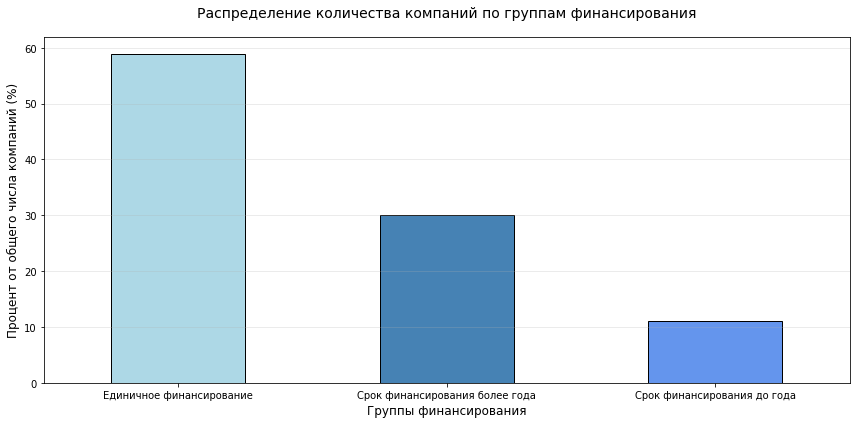

In [35]:
# Создаем DataFrame для компаний
company_stats = pd.DataFrame({
    'group': company_percentages.index,
    'percentage': company_percentages.values,
    'count': company_distribution.values
})

# Строим график для распределения компаний
plot_group_distribution(
    stats_df=company_stats,
    y_column='percentage',
    y_label='Процент от общего числа компаний (%)',
    title='Распределение количества компаний по группам финансирования'
)

Большинство стартапов **(почти 60%) ограничиваются единственным раундом финансирования**, что может свидетельствовать о высокой концентрации риска на ранних этапах.

2. Теперь посмотрим на распределение объёма инвестиций по группам финансирования.

In [36]:
# Вычисляем распределение объема инвестиций по группам
investment_distribution = df.groupby('funding_group')['funding_total_usd'].sum()
# Вычисляем в процентах от общего объема инвестиций
investment_percentages = (investment_distribution / df['funding_total_usd'].sum() * 100).round(1)
investment_percentages

funding_group
Единичное финансирование          30.6
Срок финансирования более года    61.9
Срок финансирования до года        7.5
Name: funding_total_usd, dtype: float64

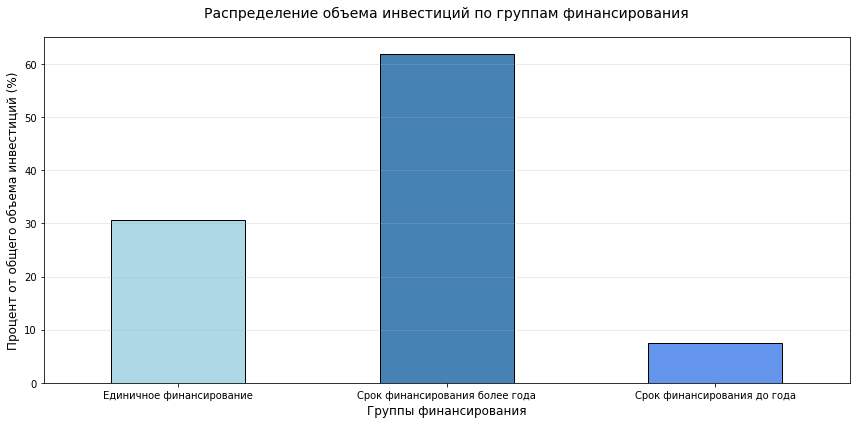

In [37]:
# Создаем DataFrame для инвестиций
investment_stats = pd.DataFrame({
    'group': investment_percentages.index,
    'percentage': investment_percentages.values,
    'total_investment': investment_distribution.values
})

# Строим график для распределения инвестиций
plot_group_distribution(
    stats_df=investment_stats,
    y_column='percentage',
    y_label='Процент от общего объема инвестиций (%)',
    title='Распределение объема инвестиций по группам финансирования'
)

Несмотря на небольшое количество компаний, **стартапы с долгосрочным финансированием (более 1 года) привлекают более 60% всего капитала**, демонстрируя доверие инвесторов к продолжительным проектам.

**Промежуточный вывод:**

Анализ выявил парадоксальную ситуацию:
- Количественно доминируют стартапы с единичным финансированием (58.9%)
- Финансово доминируют компании со сроком финансированием более 1 года (61.9% всех средств)

Это свидетельствует о том, что стратегия последовательного многократного финансирования оказывается более привлекательной для крупных инвестиций, в то время как единоразовое финансирование характерно для большего числа компаний, но с меньшими объемами привлеченного капитала.

### Выделение средних и нишевых сегментов рынка

**Компании указывают свой сегмент рынка в столбце `market`. Рассчитайте, как часто в датасете встречается каждый из сегментов. Сегменты, к которым относится более 120 компаний, отнесите к массовым, сегменты, в которые входит от 35 до 120 включительно, отнесите к средним, а сегменты до 35 компаний отнесите к нишевым. Рассчитайте, сколько сегментов попадает в каждую из категорий.**

**Постройте график распределения количества компаний в сегментах и отобразите на нём разделение на нишевые и средние сегменты.**

Для понимания рыночной концентрации мы проанализируем распределение компаний по сегментам. 

Каждый сегмент будет классифицирован на три категории: 
- `mass` - массовые (более 120 компаний)
- `mid` - средние (35-120 компаний)
- `nishe` - нишевые (менее 35 компаний).

In [38]:
# Вычисляем колличество каждого сегмента
market_counts = df.groupby('market')['market'].transform('count')

In [39]:
# Разделяем на категории с помощью pd.cut()
market_categories = pd.cut(market_counts, 
                          bins=[0, 35, 120, float('inf')], 
                          labels=['niche', 'mid', 'mass'], 
                          right=False)

# Считаем количество компаний в каждом сегменте
category_distribution = market_categories.value_counts()
category_distribution

mass     36231
mid       3839
niche      830
Name: market, dtype: int64

Анализ распределения компаний по сегментам рынка показывает высокую концентрацию бизнеса:
- 88.6% компаний работают в массовых сегментах
- Только 11.4% компаний распределены между средними и нишевыми направлениями

**Несмотря на малое количество компаний в этих категориях, их анализ важен для понимания.** Чтобы наглядно показать распределение, построим график с акцентом на нишевые и средние категории.

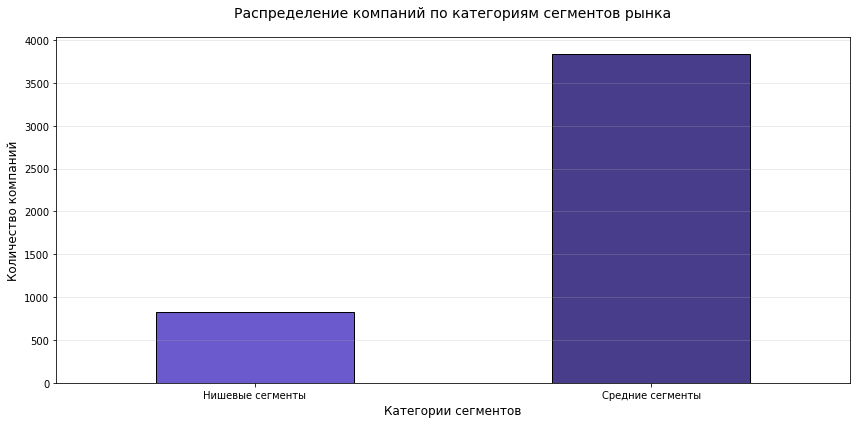

In [40]:
# Создаем данные для визуализации
categories_data = {
    'Категория': ['Нишевые сегменты', 'Средние сегменты'],
    'Количество сегментов': [category_distribution['niche'], category_distribution['mid']]
}

# Строим график
df_categories = pd.DataFrame(categories_data)
df_categories.plot(figsize=(12, 6),
                   kind='bar',
                   x='Категория',
                   y='Количество сегментов',
                   color=['slateblue', 'darkslateblue'],
                   legend=False,
                   rot=0,
                   edgecolor='black')

plt.ylabel('Количество компаний', fontsize=12)
plt.xlabel('Категории сегментов', fontsize=12)
plt.title('Распределение компаний по категориям сегментов рынка', fontsize=14, pad=20)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

Перед выводами проверим взаимосвязи:
- Связь между `market` и `funding_total_usd` - влияет ли сегмент на объем финансирования
- Связь между `market` и `funding_group` - связан ли тип сегмента со стратегией финансирования
- Связь между `funding_group` и `funding_total_usd` - подтверждение предыдущего вывода

In [41]:
# Создаем список числовых столбцов для корректного расчета Phi-K
numerical_columns = ['funding_total_usd', 'funding_rounds'] 

# Вычисляем матрицу корреляции Phi-K
correlations_matrix = phik_matrix(
    df[['market', 'funding_group', 'funding_total_usd', 'funding_rounds']], 
    interval_cols=numerical_columns
)
correlations_matrix

,market,funding_group,funding_total_usd,funding_rounds
market,1.000000,0.325135,0.000000,0.000000
funding_group,0.325135,1.000000,0.000000,0.634736
funding_total_usd,0.000000,0.000000,1.000000,0.016407
funding_rounds,0.000000,0.634736,0.016407,1.000000


**Промежуточный вывод;**

Визуализация показывает значительный перекос в распределении:
- Средние сегменты: 3 839 компаний
- Нишевые сегменты: 830 компаний

Средние сегменты привлекают в 4,6 раза больше компаний, чем нишевые. **Это свидетельствует о том, что стартапы предпочитают направления с уже сформированным рынком и аудиторией, но еще не достигшие высокой конкуренции массовых сегментов.**

Также из дополнительного анализа обнаружено, что **сегмент рынка определяет стратегию финансирования** (корреляция 0.321), но **не влияет на объем привлекаемых инвестиций** (корреляция 0.000).

**Т.е. стратегия финансирования важнее рыночного сегмента при оценке потенциала стартапа.**

Для дальнейшей работы объединим сегменты рынка в три категории для более четкого анализа:
- Массовые сегменты  в столбце `market` сохранят оригинальные названия
- Средние и нишевые сегменты будут сгруппированы под общими метками `mid` и `niche`. 

Это упростит выявление инвестиционных трендов без потери ключевой информации.

In [42]:
# Для массовых сегментов оставляем оригинальные названия, для остальных - категории
df['market'] = df['market'].where(market_categories == 'mass', market_categories)

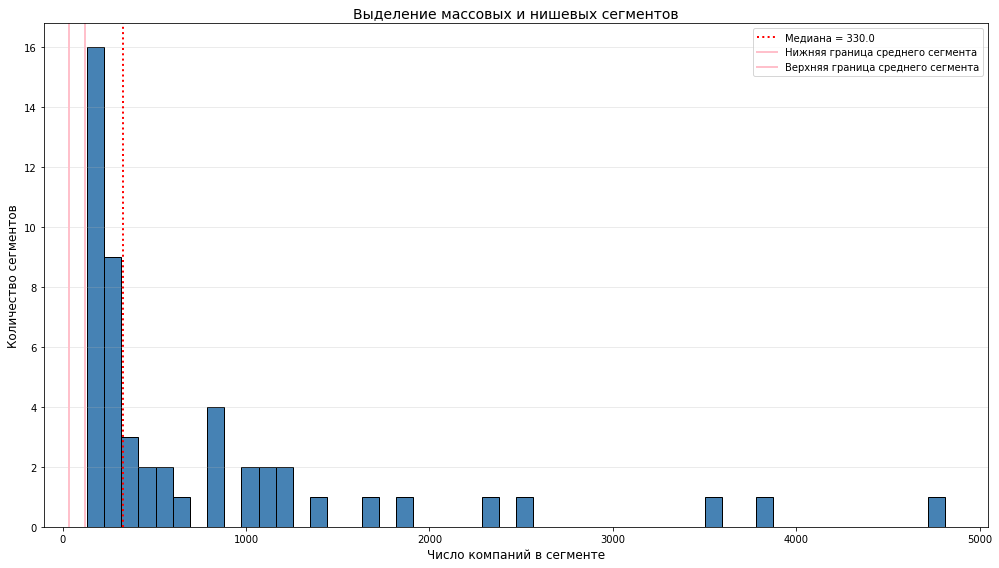

In [43]:
# Считаем количество компаний в каждом сегменте
segment_sizes = df['market'].value_counts()

# Границы сегментов
niche_max = 35
mid_min, mid_max = 35, 120
median_val = segment_sizes.median()

# Построение гистограммы 
plt.figure(figsize=(14, 8))
plt.hist(segment_sizes, bins=50, color='steelblue', edgecolor='black')

# Линии для медианы и границ среднего сегмента
plt.axvline(median_val, color='red', linestyle='dotted', linewidth=2, label=f'Медиана = {median_val:.1f}')
plt.axvline(mid_min, color='pink', linewidth=2, label='Нижняя граница среднего сегмента')
plt.axvline(mid_max, color='pink', linewidth=2, label='Верхняя граница среднего сегмента')

# Подписи и оформление
plt.title('Выделение массовых и нишевых сегментов', fontsize=14)
plt.xlabel('Число компаний в сегменте', fontsize=12)
plt.ylabel('Количество сегментов', fontsize=12)
plt.legend(loc='upper right', frameon=True)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## Работа с выбросами и анализ

### Анализируем и помечаем выбросы в каждом из сегментов

**Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.**

**По предобработанному столбцу `funding_total_usd` графическим образом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся. Укажите интервал, в котором лежат типичные значения.**

Начнем анализ с визуального исследования распределения общего объема финансирования компаний. Построим гистограмму и ящик с усами для предобработанного столбца `funding_total_usd`.

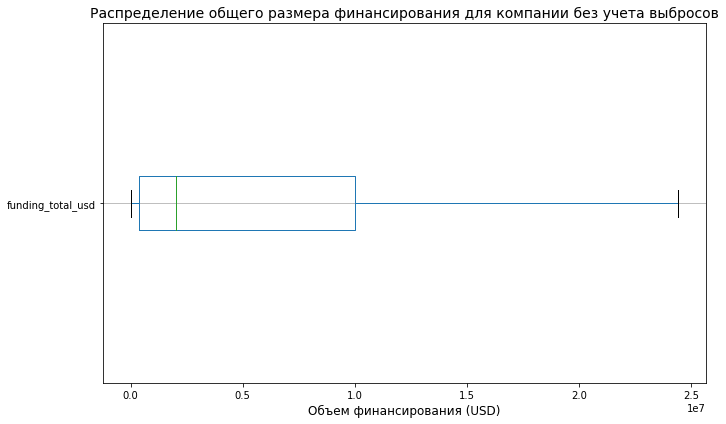

In [44]:
plt.figure(figsize=(10, 6))

df.boxplot(column='funding_total_usd', 
            vert=False, 
            showfliers=False) 
plt.title('Распределение общего размера финансирования для компании без учета выбросов', fontsize=14)
plt.xlabel('Объем финансирования (USD)', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()

plt.show()

**Промежуточный вывод:** Графически видно, что **типичный диапазон финансирования составляет примерно 0-1.0 миллионов долларов.**
- Выбивающимся (аномальным) можно считать размер финансирования, начиная примерно с 2.0-2.5 миллионов долларов и выше. 
- Распределение сильно смещено вправо - значит большинство компаний получают относительно небольшие инвестиции. Медианное значение находится около 0.2 миллионов долларов. Это подтверждает то, что большинство компаний получают относительно небольшие инвестиции.

Для более детального анализа выделим компании с аномально высоким уровнем финансирования. Поскольку разные сегменты рынка имеют различную инвестиционную специфику, **применим метод IQR отдельно для каждого сегмента.** Это позволит выявить, в каких отраслях чаще всего встречаются компании с исключительно большим объемом привлеченных средств. 

**Определим топ-5 сегментов с наибольшей долей таких 'финансовых аномалий'.**

In [45]:
# Создаём функцию для определения выбросов по сегментам
def is_funding_outlier(group):
    """
    Определяет, является ли компания выбросом по финансированию В своём сегменте
    Возвращает True для выбросов, False для типичных значений
    """
    if len(group) < 2:
        return pd.Series([False] * len(group), index=group.index)
    
    Q1 = group.quantile(0.25)
    Q3 = group.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return (group < lower_bound) | (group > upper_bound)

# Применяем функцию к каждому сегменту отдельно и сохраняем в столбец 'is_funding_outlier'
df['is_funding_outlier'] = df.groupby('market')['funding_total_usd'].transform(is_funding_outlier)

In [46]:
# Выделяем топ-5 сегментов 
top_simple = (df.groupby('market')['is_funding_outlier'].mean().sort_values(ascending=False).head(5))
top_simple

market
real estate        0.172043
entertainment      0.166667
consulting         0.166189
search             0.164948
cloud computing    0.164474
Name: is_funding_outlier, dtype: float64

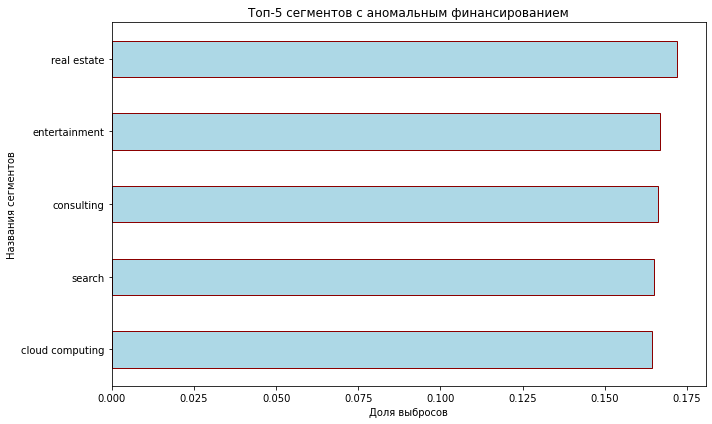

In [47]:
# Для лучшего отображения пересортирую сегменты 
top_for_plot = top_simple.sort_values(ascending=True)

# Визуализируем
plt.figure(figsize=(10, 6))
top_for_plot.plot(kind='barh',
                color='lightblue',
                edgecolor='darkred')
plt.title('Топ-5 сегментов с аномальным финансированием')
plt.ylabel('Названия сегментов')
plt.xlabel('Доля выбросов')

plt.tight_layout()
plt.show()

**Промежуточный вывод:** Для идентификации компаний с аномальным объемом финансирования был применен метод IQR отдельно для каждого рыночного сегмента. Это позволяет учесть специфику финансирования в разных отраслях.

**Топ-5 сегментов рынка с наибольшей долей компаний, получивших аномальное финансирование:**
- Real Estate — 17.2%
- Entertainment — 16.7%
- Consulting — 16.6%
- Search — 16.5%
- Cloud Computing — 16.4%

Эти сегменты демонстрируют наибольшую внутреннюю дисперсию в объемах привлеченных инвестиций, где значительная часть компаний (примерно каждая 6-7) резко выделяется на фоне других в своем сегменте по сумме общего финансирования.

### Определяем границы рассматриваемого периода, отбрасываем аномалии

**Проверьте по датасету, можно ли считать, что вам предоставили полные данные за 2014 год. Затем исключите из датасета компании, которые вы ранее посчитали получившими аномальное финансирование.**

**Когда исключите аномальные записи, на основе столбцов `mid_funding_at` и `funding_rounds` оставьте в датасете данные только об определённых компаниях. Они должны были получать финансирование в годы, когда было зафиксировано 50 или более раундов финансирования.**

Прежде чем приступать к дальнейшему анализу проведем анализ полноты данных за 2014 год, чтобы определить границы рассматриваемого периода. Изучим распределение компаний по месяцам создания и финансирования.

In [48]:
# Проверка полноты данных за 2014 год
# Распределение компаний по месяцам создания в 2014 году
df[df['founded_at'].dt.year == 2014]['founded_at'].dt.month.value_counts().sort_index()

1     414
2     110
3     115
4      98
5      81
6      73
7      46
8      31
9      26
10     16
11      3
12      2
Name: founded_at, dtype: int64

In [49]:
# Проверка полноты данных за 2014 год
# Распределение финансирования по месяцам в 2014 году
df[df['mid_funding_at'].dt.year == 2014]['mid_funding_at'].dt.month.value_counts().sort_index()

1     739
2     600
3     675
4     644
5     600
6     740
7     687
8     559
9     547
10    497
11    306
12     23
Name: mid_funding_at, dtype: int64

**Промежуточный вывод:** Анализ данных за 2014 год показывает их явную неполноту, особенно в конце года. Количество новых компаний падает с 414 в январе до 2 в декабре, а раунды финансирования сокращаются с 500-700 до 23 в декабре. Это указывает, что данные были собраны до завершения года.

Учитывая неполноту данных за 2014 год выполним фильтрацию данных: сначала удалим компании с аномальным финансированием, затем оставим только те компании, которые получали финансирование в годы с достаточной статистической значимостью (50+ раундов финансирования).

In [50]:
# Исключеним компании с аномальным финансированием (используем наш булев столбец)
df_filtered = df[~df['is_funding_outlier']]

In [51]:
# Считаем количество раундов по годам
rounds_per_year = df_filtered['mid_funding_at'].dt.year.value_counts()
# Отбираем годы с 50+ раундами
active_years = rounds_per_year[rounds_per_year >= 50].index
active_years

Float64Index([2013.0, 2014.0, 2012.0, 2011.0, 2010.0, 2009.0, 2008.0, 2007.0,
              2006.0, 2005.0, 2004.0, 2000.0, 2003.0],
             dtype='float64')

In [52]:
# Оставляем только компании, которые получали финансирование в эти активные годы
df_final = df_filtered[df_filtered['mid_funding_at'].dt.year.isin(active_years)]
len(df_final)

35497

**Промежуточный вывод:** В результате фильтрации данных мы получили итоговый датасет, содержащий `35497 компаний`. В выборку вошли только компании с типичным объемом финансирования (исключены аномалии, определенные методом IQR по сегментам), которые получали инвестиции в периоды активной инвестиционной деятельности - в годы с 50 и более раундами финансирования.

### Анализ типов финансирования по объёму и популярности

**Постройте график, который покажет, какие типы финансирования в сумме привлекли больше всего денег. Ориентируйтесь на значения в столбцах `seed`, `venture`, `equity_crowdfunding`, `undisclosed`, `convertible_note`, `debt_financing`, `angel`, `grant`, `private_equity`, `post_ipo_equity`, `post_ipo_debt`, `secondary_market` и `product_crowdfunding`.**

**Также постройте график, который покажет популярность разных типов финансирования — какие типы финансирования чаще всего используются компаниями, то есть встречаются в датасете наибольшее количество раз.
Сравните графики и выделите часто используемые типы финансирования, которые при этом характеризуются небольшими объёмами, и наоборот — те, что встречаются редко, но при этом характеризуются значительным объёмом предоставленных сумм.**

Теперь проанализируем инвестиционную активность по типам финансирования. Построим два сравнительных графика:
1. первый покажет общий объем привлеченных средств по каждому типу финансирования
2. второй - популярность этих типов среди компаний.

Сравнив эти графики, мы сможем выявить интересные закономерности: какие типы финансирования массовые, но с небольшими чеками, а какие - редкие, но с крупными инвестициями.

In [53]:
# Выбираем столбцы с типами финансирования
types_funding = ['seed', 'venture', 'equity_crowdfunding', 'undisclosed', 
                 'convertible_note', 'debt_financing', 'angel', 'grant', 
                 'private_equity', 'post_ipo_equity', 'post_ipo_debt', 
                 'secondary_market', 'product_crowdfunding']

In [54]:
# Считаем общую сумму денег по каждому типу финансирования
total_money = df_final[types_funding].sum().sort_values(ascending=False)
total_money

venture                 1.285665e+11
seed                    9.417179e+09
debt_financing          8.157014e+09
private_equity          4.835609e+09
angel                   2.474924e+09
undisclosed             2.021432e+09
grant                   1.978699e+09
post_ipo_equity         1.946152e+09
convertible_note        5.645394e+08
post_ipo_debt           2.867183e+08
equity_crowdfunding     2.379606e+08
product_crowdfunding    1.860939e+08
secondary_market        4.528580e+07
dtype: float64

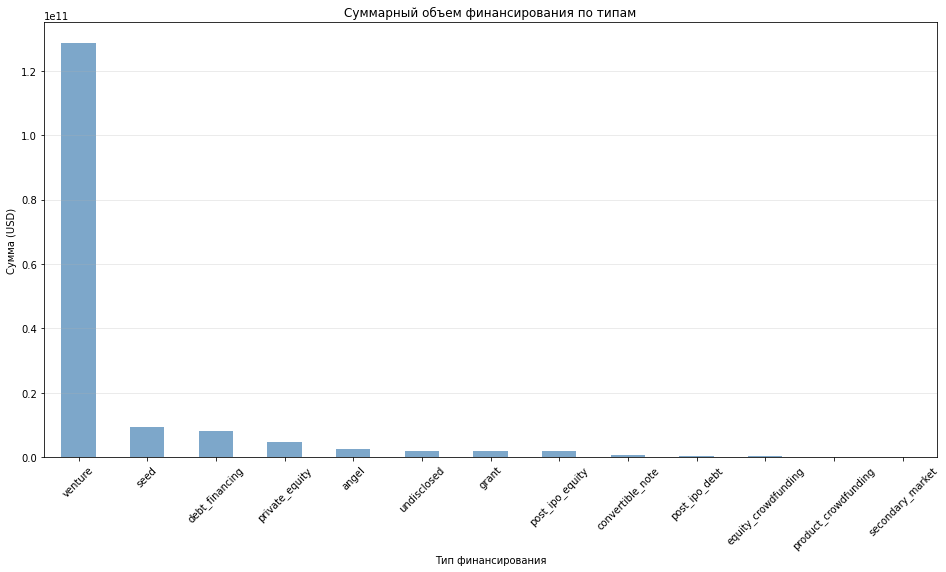

In [55]:
# Строим график
plt.figure(figsize=(16, 8))
total_money.plot(kind='bar',
                 color='steelblue',
                 alpha=0.7)
plt.title('Суммарный объем финансирования по типам')
plt.ylabel('Сумма (USD)')
plt.xlabel('Тип финансирования')
plt.xticks(rotation=45)

plt.grid(axis='y', alpha=0.3)
plt.show()

In [56]:
# Количество компаний по каждому типу финансирования 
popularity = (df_final[types_funding] > 0).sum().sort_values(ascending=False)
popularity

venture                 18759
seed                    13353
debt_financing           3258
angel                    2931
grant                    1001
undisclosed               803
private_equity            633
convertible_note          520
equity_crowdfunding       515
product_crowdfunding      204
post_ipo_equity           163
post_ipo_debt              27
secondary_market            7
dtype: int64

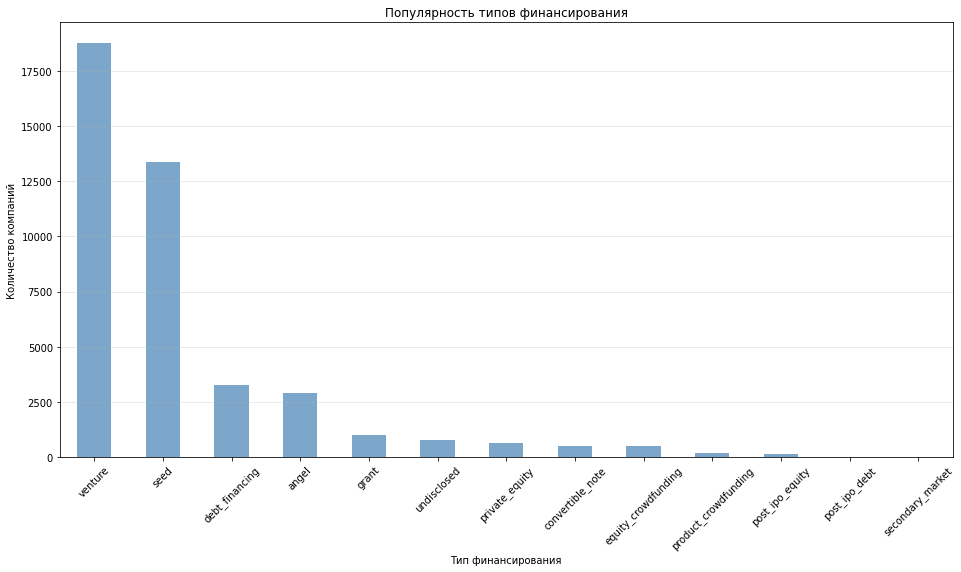

In [57]:
# Строим график
plt.figure(figsize=(16, 8))
popularity.plot(kind='bar',
                color='steelblue',
                alpha=0.7)
plt.title('Популярность типов финансирования')
plt.ylabel('Количество компаний')
plt.xlabel('Тип финансирования')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.show()

**Промежуточный вывод:** 
Анализ выявил два типа финансирования:
1. Массовые с малыми чеками - `angel`(2931 компания), `grant`(1001 компания), `undisclosed`( 803 компании) 
2. Элитные с крупными чеками - `private_equity`(всего 633 компании), `post_ipo_equity`(всего 163 компании), `post_ipo_debt`(всего 27 компаний)

- **`venture` лидирует по обоим показателям - самый популярный и самый объемный тип финансирования: 18759 компаний и 128.57 млрд.дол**
- **`seed` - второй по популярности (13353 компании), но значительно уступает по объёму. (9.42 млрд.дол)**

Перейдем к анализу доходности инвестиций. На основе дополнительного датасета построим график суммарных объемов возвратов по типам финансирования за весь период.

In [58]:
# Определяем столбцы с типами финансирования
funding_columns = ['seed', 'venture', 'equity_crowdfunding', 'undisclosed', 
                   'convertible_note', 'debt_financing', 'angel', 'grant', 
                   'private_equity', 'post_ipo_equity', 'post_ipo_debt', 
                   'secondary_market', 'product_crowdfunding']

In [59]:
# Суммируем возвраты по каждому типу финансирования
total_returns = returns_info[funding_columns].sum().sort_values(ascending=False)
total_returns

venture                 40578.62
debt_financing           4734.85
private_equity           3587.33
seed                     2382.24
angel                    1509.23
post_ipo_equity          1104.96
undisclosed               730.88
post_ipo_debt              91.03
convertible_note           34.79
secondary_market            5.20
equity_crowdfunding         3.83
product_crowdfunding        1.86
grant                       0.00
dtype: float64

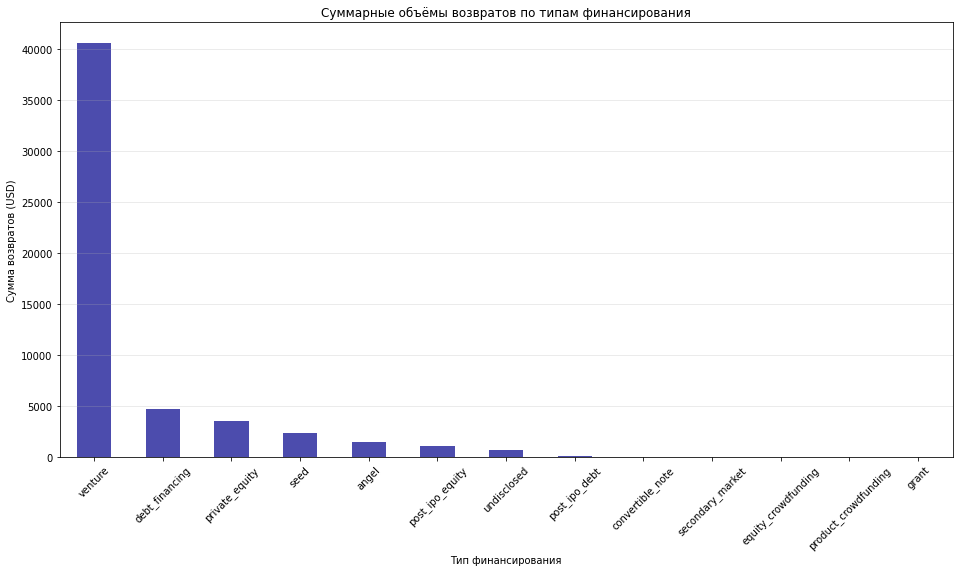

In [60]:
# Строим график
plt.figure(figsize=(16, 8))
total_returns.plot(kind='bar',
                   color='darkblue',
                   alpha=0.7)
plt.title('Суммарные объёмы возвратов по типам финансирования')
plt.ylabel('Сумма возвратов (USD)')
plt.xlabel('Тип финансирования')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.show()

Анализ возвратов показал:
- Лидер: `venture` (40,578) - доминирует с огромным отрывом
- Значительные: `debt_financing`, `private_equity`, `seed`, `angel` (1,500-4,700)
- Умеренные: `post_ipo_equity`, `undisclosed` (700-1,100)
- Минимальные: остальные типы (<100)
- Нулевые: `grant` (0.00)

**Ключевое наблюдение:** `venture` - венчурное финансирование не только лидирует по объемам привлеченных средств, но и приносит наибольшие возвраты инвесторам, что подтверждает его эффективность как инвестиционного инструмента.

## Анализ динамики

### Динамика предоставления финансирования по годам

**Используя столбцы `funding_total_usd` и `funding_rounds`, рассчитайте для каждой компании средний объём одного раунда финансирования.**

**На основе получившейся таблицы постройте графики, отражающие:**
- **динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования;**
- **динамику общего количества раундов за каждый год, то есть насколько активно происходили инвестиции на рынке (чем больше раундов, тем выше активность).**

**Когда будете строить графики в этом задании и следующих, используйте данные только по тем компаниям, которые остались в датасете после предыдущих фильтраций.**

**На основе полученных данных ответьте на вопросы:**
- **В каком году типичный размер средств, собранных в рамках одного раунда, был максимальным?**
- **Какая тенденция наблюдалась в 2014 году по количеству раундов и средств, выделяемых в рамках каждого раунда?**

Проанализируем инвестиционную активность на рынке стартапов. Рассчитаем средний объем финансирования на один раунд для каждой компании и построим графики, которые покажут:
- как менялся типичный размер инвестиций в раундах с течением времени
- насколько активно развивался рынок по количеству заключенных сделок

In [61]:
# Создаем копию датафрейма для безопасного изменения
df_end= df_final.copy()

In [62]:
# Рассчитываем средний объём одного раунда финансирования для каждой компании
df_end['avg_round_amount'] = df_end['funding_total_usd'] / df_end['funding_rounds']

In [63]:
# Добавляем столбец с годом для группировки
df_end['funding_year'] = df_end['mid_funding_at'].dt.year

In [64]:
# Группируем по годам для анализа динамики
yearly_stats = df_end.groupby('funding_year').agg({
    'avg_round_amount': 'median',  
    'funding_rounds': 'sum'        
}).reset_index()
yearly_stats

,funding_year,avg_round_amount,funding_rounds
0,2000,2.250000e+06,113
1,2003,1.500000e+06,125
2,2004,3.000000e+06,181
3,2005,4.500000e+06,948
4,2006,3.900000e+06,1849
5,2007,2.879167e+06,2842
6,2008,2.170744e+06,3663
7,2009,1.498475e+06,4617
8,2010,1.250000e+06,6134
9,2011,8.676411e+05,7576


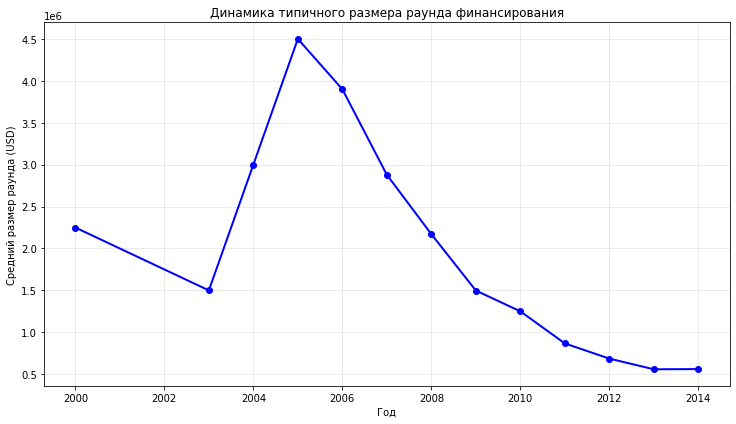

In [65]:
# Строим график типичного размера раунда
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.plot(yearly_stats['funding_year'],
         yearly_stats['avg_round_amount'], 
         marker='o',
         linewidth=2,
         markersize=6,
         color='blue'
)
plt.title('Динамика типичного размера раунда финансирования')
plt.xlabel('Год')
plt.ylabel('Средний размер раунда (USD)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

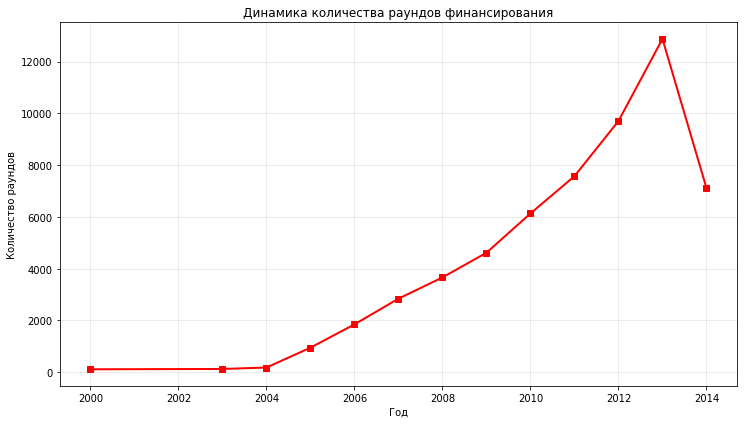

In [66]:
# Строим график количества раундов
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 2)
plt.plot(yearly_stats['funding_year'],
         yearly_stats['funding_rounds'],
         marker='s', 
         linewidth=2,
         markersize=6,
         color='red')
plt.title('Динамика количества раундов финансирования')
plt.xlabel('Год')
plt.ylabel('Количество раундов')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**На основе графиков можно сделать выводы:**

1. Типичный размер средств, собранных в рамках одного раунда, был максимальным в 2005 году (4.500.000 USD).
2. В 2014 году продолжилась долгосрочная тенденция снижения среднего размера раунда, которая наблюдалась с 2005 года, однако темпы снижения значительно замедлились. При этом произошло резкое сокращение инвестиционной активности - количество раундов уменьшилось почти вдвое по сравнению с предыдущим годом.

### Динамика размера общего финансирования по массовым сегментам рынка для растущих в 2014 году сегментов

**Составьте сводную таблицу, в которой указывается суммарный размер общего финансирования `funding_total_usd` по годам и сегментам рынка. Отберите из неё только те сегменты, которые показывали рост размера суммарного финансирования в 2014 году по сравнению с 2013.**

**На графике отразите, как менялся суммарный размер общего финансирования в каждом из отобранных сегментов по годам, за которые у вас достаточно данных. Рассматривайте только массовые сегменты, а средние и нишевые исключите.
На основе графика сделайте вывод о том, какие сегменты показывают наиболее быстрый и уверенный рост.**

Выявим наиболее быстрорастущие направления на рынке. Сфокусируемся на массовых сегментах, которые продемонстрировали рост финансирования в 2014 году. Построим динамику общего объема инвестиций по этим сегментам, чтобы определить:
- какие отрасли показывают устойчивый рост
- какие направления являются наиболее перспективными для инвестиций

In [67]:
# Создаем сводную таблицу: сумма funding_total_usd по годам и сегментам
pivot_table = pd.pivot_table(
    df_end, 
    values='funding_total_usd', 
    index='funding_year', 
    columns='market', 
    aggfunc='sum',
    fill_value=0
)

In [68]:
# Исключаем сегменты 'mid', 'niche' и 'not specified', оставляем только массовые
exclude_segments = ['mid', 'niche', 'not_specified']
mass_segments = [col for col in pivot_table.columns if col not in exclude_segments]

# Создаем сводную таблицу только для массовых сегментов
pivot_table_mass = pivot_table[mass_segments]
pivot_table_mass

market,advertising,analytics,apps,automotive,big data,biotechnology,clean technology,cloud computing,consulting,curated web,design,e-commerce,education,enterprise software,entertainment,fashion,finance,games,hardware + software,health and wellness,health care,hospitality,internet,manufacturing,marketplaces,medical,messaging,mobile,music,networking,news,nonprofits,photography,public relations,real estate,saas,search,security,semiconductors,social media,social network media,software,sports,startups,technology,travel,video,web hosting
funding_year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000,14470000,14822803,0,0,0,0,0,11500000,4500000,1000000,0,32879052,0,4711445,100000,0,15000000,21728774,0,11900000,16000000,0,10000000,56659310,0,24000000,0,10000000,0,0,0,6500000,0,0,2500000,0,2001000,20211700,0,0,0,31732640,0,0,0,50230,0,95343090
2003,10500000,3840000,0,4530000,0,85531178,50352939,0,0,2550000,0,0,2500000,7669661,0,9800000,25320000,11348830,12200000,3414041,0,0,0,4269608,0,0,0,8010058,0,0,1000000,0,7100000,0,6292200,0,5000000,13650000,28000000,5000,0,66086037,0,0,0,0,5000000,0
2004,6000000,3000000,0,0,0,97184859,50427954,0,0,27050000,0,1505741,1350000,4500000,0,0,0,38150000,14775000,0,22219087,0,10500000,3000000,0,0,13300000,69822132,0,0,0,0,0,0,0,0,10800000,68350000,88782797,6850000,0,140823795,0,0,1750000,10230000,14704000,27000000
2005,127196022,79014044,0,22500000,0,480063583,19420000,0,44862000,53450000,9300000,10568620,4751000,320413544,10000000,0,48235001,86626921,280865552,30210000,111091410,1020480,1775000,61770000,0,11090000,115917020,219894870,9970000,0,9590000,17051520,7000000,79695875,250000,5240000,11800000,333759701,586220751,14780000,5200000,993076581,1882200,0,50728425,27830000,6470551,483332632
2006,299299458,139701311,1310600,12660000,0,903500543,131473889,9951809,23965548,164673698,707000,111222710,9511823,828288298,1800000,2620000,185839768,289892138,411754024,20770000,623056656,14655808,5000,163957751,0,20250000,145133772,347275817,56466885,26889850,37116568,12880000,6686406,38600000,2080000,4791121,37821719,237943300,1227940797,60169880,5245100,1646868624,7000000,0,22791000,11700000,35171772,649959267
2007,556704331,98829000,0,37712601,7780000,1704078338,749711239,20354343,70346345,314704515,10800000,87784386,30283001,955973554,31224025,2000000,371704739,563631628,492471382,66828401,806054641,13547173,4495379,147726051,4145720,2100000,75270099,405971659,61033838,43745721,60941043,200000,10115000,28510000,33220000,14652595,49639551,396996223,1616604148,89022516,24104021,1686115571,16401580,0,180190209,13950000,85150644,361121449
2008,622673464,208077840,4300000,59478635,2452515,1716033000,3165808492,44375000,19061080,336500027,5944302,177398187,85012747,991664296,33600000,34246883,314876377,435172418,298931267,17467779,1029156722,6544195,23412964,173054260,2710000,28812744,67854600,550375090,50248570,30807000,87416014,7110739,20549322,33295618,46613100,27226900,59304296,453928952,1107199296,76034534,10998076,1365005648,9554790,5010387,277726238,54905631,37865177,781623731
2009,563446005,140949327,7219000,20800311,597375,3915900521,1963502838,52223719,62715165,261360483,2150144,215596616,68078539,839761818,11069585,49065396,235304383,350377449,525233787,204312760,1643318315,31309584,38195773,422862531,1938668,11566200,49811011,487059218,32937879,30227412,48635801,4766000,35775864,60728338,38840213,13536585,27173428,361237607,1434206661,60033256,9451188,1254334523,11808750,460700,36078850,24536468,22305584,471131028
2010,631617869,253739903,6123779,17696916,39233297,4894500078,1604429454,8525538,81264877,347018615,17239975,441210821,157384204,1257557224,17197608,156834036,446798391,386797040,484078070,224060797,1990032146,49650428,36657500,244329661,7249013,25590338,59716947,566793518,29641201,46182204,103945563,15354984,17397484,27895976,37344608,32609390,31486334,318118299,767823570,69447197,24043416,1520172121,38184989,2111966,312526805,44461808,79974203,534480485


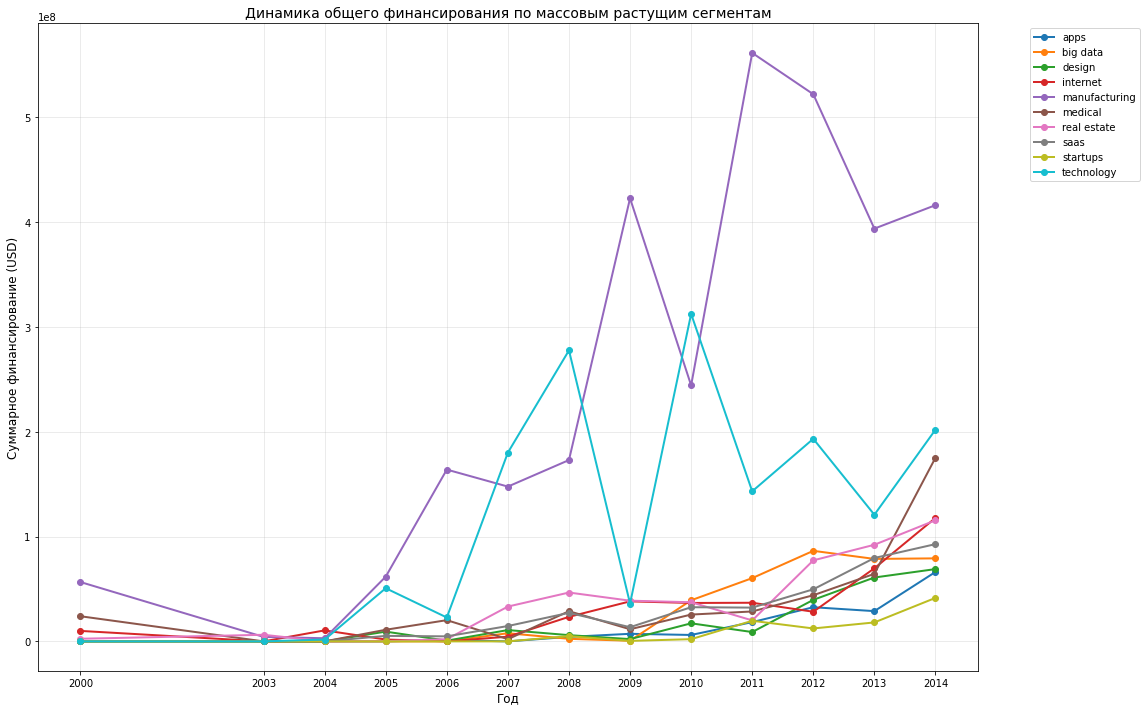

In [69]:
# Отбираем массовые сегменты с ростом в 2014 году
if 2013 in pivot_table_mass.index and 2014 in pivot_table_mass.index:
    growth_mass_segments = [seg for seg in pivot_table_mass.columns 
                           if (pivot_table_mass.loc[2014, seg] > pivot_table_mass.loc[2013, seg] > 0)]# Отбираем массовые сегменты с ростом в 2014 году

    if growth_mass_segments:
        # Строим график для всех массовых растущих сегментов
        plt.figure(figsize=(16, 10))
        for segment in growth_mass_segments:
            plt.plot(pivot_table_mass.index, 
                     pivot_table_mass[segment], 
                     marker='o', 
                     label=segment, 
                     linewidth=2)
        
        plt.title('Динамика общего финансирования по массовым растущим сегментам', fontsize=14)
        plt.xlabel('Год', fontsize=12)
        plt.ylabel('Суммарное финансирование (USD)', fontsize=12)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, alpha=0.3)
        plt.xticks(pivot_table_mass.index)
        
        plt.tight_layout()
        plt.show()

**Промежуточный вывод:**
**Сегменты со стабильным уверенным ростом:**
1. `Medical` - действительно показывает самый стабильный и предсказуемый рост с 2009 года практически без колебаний
2. `Real Estate` - демонстрирует устойчивый рост с 2008 года, особенно заметный с 2011 года
3. `Internet` - хотя и имеет некоторые колебания, в целом показывает уверенный восходящий тренд

Эти сегменты демонстрируют меньшую волатильность и более предсказуемую динамику, что может говорить о их зрелости и устойчивости на рынке.

**Сегменты с более волатильным, но быстрым ростом:**
1. `Big Data` - очень быстрый, но более "скачкообразный" рост
2. `SaaS` - экспоненциальный рост в последние годы, но с более резкими изменениями

### Годовая динамика доли возвращённых средств по типам финансирования

**Заказчик хочет знать, какая часть вложенных или выданных денег со временем возвращается обратно инвесторам или финансистам. Ваша цель — для каждого года и каждого вида финансирования рассчитать нормированные значения возврата средств: то есть какую долю возвращённые средства составляют от предоставленных. При этом слишком большие аномальные значения, то есть неадекватные выбросы, нужно заменить на пропуски.**

**Совет: когда будете делить сумму возвращённых средств на суммарный объём привлечённого финансирования по конкретному году, добавьте к знаменателю небольшое число, например `1e-60`. Это поможет избежать деления на ноль.**

Оценим эффективность различных типов финансирования с точки зрения возврата вложенных средств. Рассчитаем долю возвращенных средств для каждого типа инвестиций и проанализируем их динамику по годам.

In [70]:
# Агрегируем привлеченное финансирование по годам из основного датафрейма
funding_by_year = df_end.groupby('funding_year')[funding_columns].sum()
funding_by_year

,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding
funding_year,,,,,,,,,,,,,
2000,1.675914e+07,3.279622e+08,0.0,112202640.0,0.0,1.400000e+07,24086333.0,293114.0,0.000000e+00,3467747.0,0.0,7718867.0,0.0
2003,1.531836e+07,3.722344e+08,0.0,10280000.0,0.0,1.050000e+06,5629661.0,16850717.0,0.000000e+00,0.0,0.0,0.0,0.0
2004,1.810473e+07,6.641505e+08,0.0,62912359.0,0.0,3.081662e+07,11013741.0,10363600.0,0.000000e+00,0.0,0.0,0.0,0.0
2005,3.942520e+07,4.809711e+09,0.0,8871332.0,0.0,1.017207e+08,60914621.0,6266481.0,5.000000e+06,4796022.0,0.0,0.0,0.0
2006,6.679477e+07,9.020604e+09,933057.0,61545498.0,10702385.0,1.408484e+08,70756153.0,6147500.0,1.782024e+07,0.0,0.0,0.0,0.0
2007,1.922965e+08,1.206209e+10,0.0,109649902.0,14116788.0,2.086016e+08,201152441.0,34237779.0,1.533702e+08,12000000.0,0.0,0.0,0.0
2008,3.020030e+08,1.423473e+10,0.0,119920337.0,28600902.0,4.286221e+08,249299613.0,23485347.0,1.917563e+08,36000000.0,0.0,0.0,1000000.0
2009,2.843514e+08,1.475536e+10,2049671.0,99687229.0,41257969.0,1.015071e+09,157822426.0,300835487.0,2.581190e+08,36628903.0,0.0,19300000.0,303050.0
2010,5.037636e+08,1.659422e+10,7400000.0,210408873.0,46247821.0,1.131603e+09,245725462.0,226905678.0,5.249279e+08,85510500.0,0.0,910000.0,3500000.0


In [71]:
# Агрегируем возвраты по годам из датафрейма returns_info
returns_by_year = returns_info.groupby('year')[funding_columns].sum()
returns_by_year

,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding
year,,,,,,,,,,,,,
2000,16.70,55.40,0.00,78.21,0.00,8.66,6.43,0.0,0.00,0.94,0.00,0.20,0.00
2001,2.88,23.49,0.00,21.50,0.01,4.49,1.18,0.0,0.00,0.46,0.00,0.46,0.00
2002,6.59,209.42,0.00,25.77,0.02,3.42,3.41,0.0,1.51,0.34,0.00,0.06,0.00
2003,7.74,233.86,0.00,9.40,0.01,1.09,3.41,0.0,1.62,2.11,0.00,0.08,0.00
2004,9.93,555.90,0.00,33.19,0.01,13.55,9.18,0.0,2.19,3.38,0.00,0.55,0.00
2005,26.60,2628.92,0.00,9.51,0.02,35.09,31.06,0.0,2.40,3.51,0.00,0.05,0.00
2006,61.81,3100.18,0.19,46.74,1.78,113.21,47.75,0.0,16.67,20.58,0.00,0.12,0.00
2007,70.41,3585.37,0.01,55.37,3.22,125.68,164.51,0.0,88.81,24.36,0.00,0.57,0.00
2008,89.72,2717.02,0.03,41.02,1.71,397.54,102.83,0.0,130.38,84.28,0.00,0.47,0.00


In [72]:
# Объединяем данные по годам и сразу рассчитываем доли возвратов
common_years = funding_by_year.index.intersection(returns_by_year.index)
# Создаем DataFrame с долями возвратов
return_ratios = returns_by_year.loc[common_years] / (funding_by_year.loc[common_years] + 1e-60)

In [73]:
# Заменяем аномальные выбросы на NaN
return_ratios_clean = return_ratios.where((return_ratios <= 1) & (return_ratios >= 0))

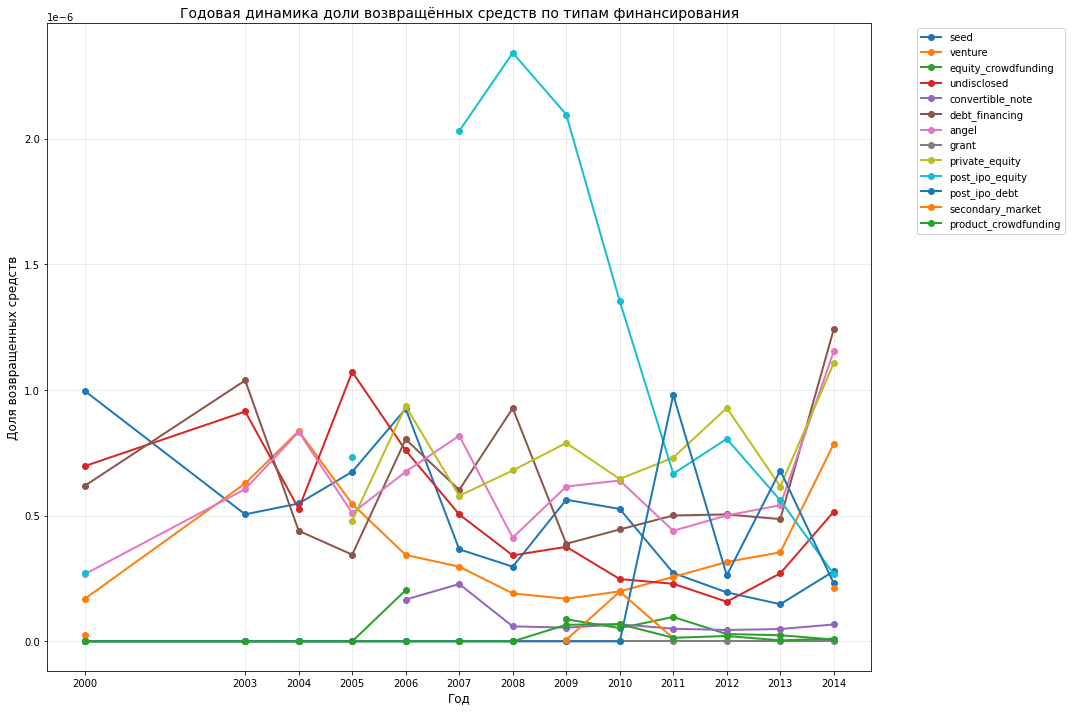

In [74]:
# Строим график
plt.figure(figsize=(15, 10))
for fund_type in funding_columns:
    if fund_type in return_ratios_clean.columns:
        plt.plot(return_ratios_clean.index,
                 return_ratios_clean[fund_type], 
                 marker='o', 
                 label=fund_type, 
                 linewidth=2)

plt.title('Годовая динамика доли возвращённых средств по типам финансирования', fontsize=14)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Доля возвращенных средств', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(return_ratios_clean.index)

plt.tight_layout()
plt.show()

**На основе данных о доле возвращённых средств можно выделить следующие ключевые наблюдения:**
- Стабильно высокую возвратность показывают долговые инструменты `debt_financing`, что объясняется их структурой с фиксированными сроками и обязательствами.
- Положительную динамику демонстрируют венчурные инвестиции `venture` и ангельское финансирование `angel`, которые к 2014 году показывают заметный рост доли возвратов.
- Нестабильную динамику наблюдается у частных инвестиций `private_equity` - после перерыва с 2000 по 2005 год показатель демонстрирует резкие колебания, а также `post_ipo_equity`, которые также резко появлялся и демонстрировал динамичные показатели.
- Низкую возвратность сохраняют `product_crowdfunding`.

Детально проанализируем динамику возвратности пяти основных типов финансирования: `venture`, `debt_financing`, `private_equity`, `seed` и `angel`. И сделаем вывод о том, в каких типах финансирования наблюдается наиболее устойчивый рост показателя.

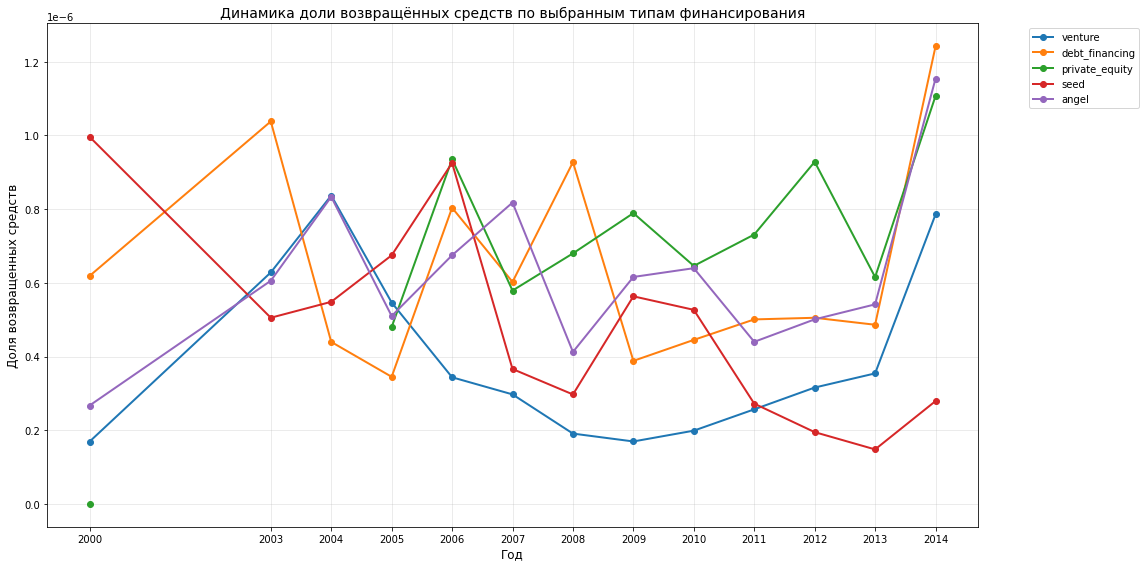

In [75]:
# Строим график для выбранных типов финансирования
plt.figure(figsize=(16, 8))

for fund_type in ['venture', 'debt_financing', 'private_equity', 'seed', 'angel']:
    plt.plot(return_ratios_clean.index,
             return_ratios_clean[fund_type], 
             marker='o', 
             label=fund_type, 
             linewidth=2)

plt.title('Динамика доли возвращённых средств по выбранным типам финансирования', fontsize=14)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Доля возвращенных средств', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(return_ratios_clean.index)

plt.tight_layout()
plt.show()

**Промежуточный вывод:** 
- Наиболее устойчивый рост демонстрирует долговое финансирование `debt_financing` - стабильная восходящая динамика с минимальными колебаниями, что подтверждает его надежность как инструмента с предсказуемой возвратностью.
- Частные инвестиции `private_equity` показывают сложную динамику: после единичной точки в 2000 году следует перерыв, а с 2005 года - резкий скачкообразный рост. Это свидетельствует о трансформации рынка `private equity` - от единичных сделок к становлению системного инвестиционного инструмента с высоким потенциалом возвратности, но сохраняющейся волатильностью.

**Общий вывод по динамике предоставления финансирования по годам:**
После пика 2005 года, когда средний размер раунда достиг максимума (около 4,5 млн USD), наблюдается долгосрочная тенденция снижения. Однако начиная с 2014 года темпы падения замедляются, что может свидетельствовать о переходе рынка к более зрелой, сбалансированной структуре инвестиций. В то же время число раундов резко сокращается, что указывает на консолидацию инвесторов и рост избирательности при финансировании проектов.

- Стабильный рост показывают сегменты `Medical`, `Real Estate` и `Internet`, отличающиеся предсказуемостью и устойчивостью.
- Быстрорастущий, но волатильный характер сохраняют `Big Data` и`SaaS`, отражая динамику новых технологий.
- Наиболее надёжной формой остаётся долговое финансирование, в то время как `private equity` и `post IPO equity` развиваются скачкообразно.

**В целом рынок движется от бурного роста к структурной стабильности и качественной диверсификации источников капитала.**


## Итоговый вывод и рекомендации

Проведено исследование закономерностей финансирования стартапов на основе исторических данных из файлов `cb_investments.csv` и `cb_returns.csv`, включающее анализ 40 900 записей после предобработки.

**Главные выводы:**
Анализ показал, что после пика 2005 года рынок стартап-финансирования перешёл в стадию зрелости: объёмы инвестиций снизились, но стали более стабильными и предсказуемыми.

1. Устойчивый рост демонстрируют отрасли `Medical`, `Real Estate` и `Internet`, отражающие зрелые и надёжные направления для инвестиций. Сегменты `Big Data` и `SaaS` отличаются быстрым, но волатильным развитием, что делает их привлекательными для инвесторов, готовых к повышенному риску.
2. Среди инструментов финансирования лидирует `venture` — он обеспечивает наибольшие объёмы привлечённых средств и высокую возвратность. `Debt financing` подтверждает свою стабильность и подходит для консервативных стратегий.

**Оценка согласованности выводов:**
Все полученные результаты логично взаимосвязаны и подтверждают общую тенденцию перехода рынка от бурного роста к структурной устойчивости. Противоречий между отдельными наблюдениями не выявлено; различия в динамике отраслей отражают естественное разделение между зрелыми и инновационными сегментами.

**Рекомендация:**
Таким образом, стратегия инвестора в 2015 году должна строиться на венчурном подходе с элементами долгового финансирования — для диверсификации рисков, максимизации доходности и устойчивого роста инвестиционного портфеля.